In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RepliSage.network_analysis import *
from collections import Counter
from itertools import product

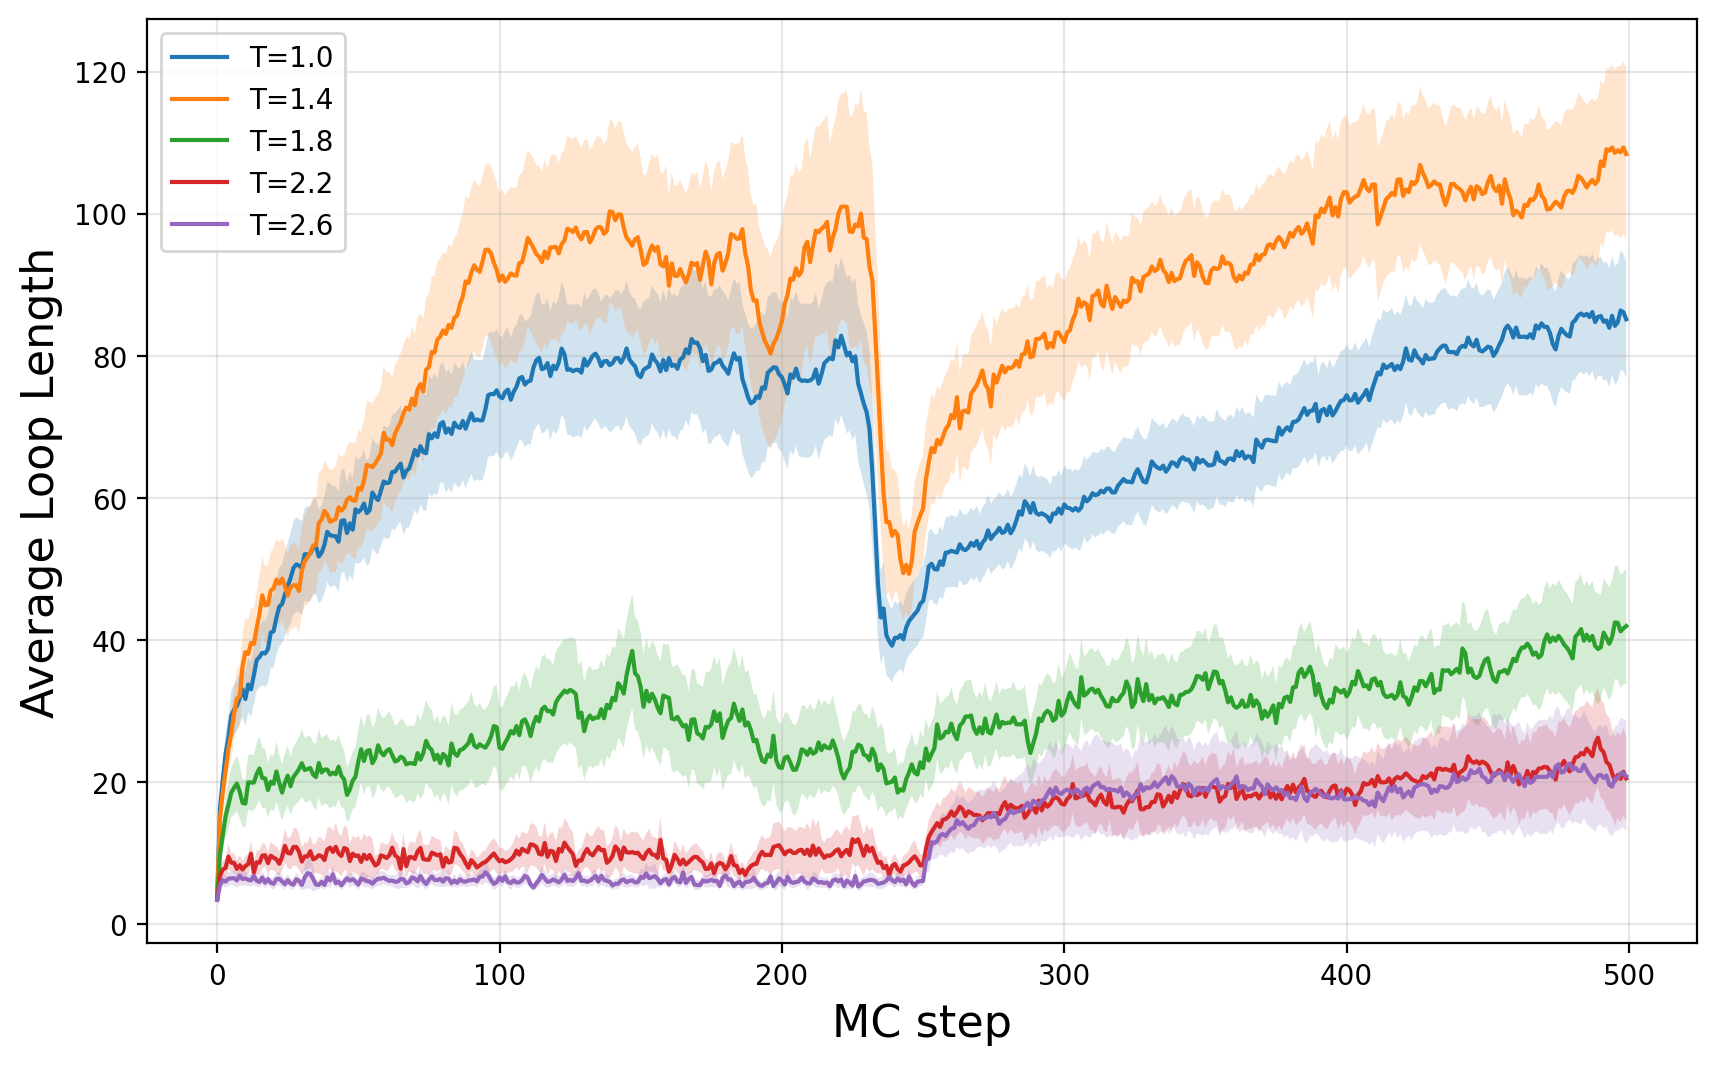

In [2]:
Ts = np.array([1.0, 1.4, 1.8, 2.2,2.6])

plt.figure(figsize=(10, 6),dpi=200)

for T in Ts:
    T = round(T, 3)
    Ms = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Tinit_{T}_ht/metadata/Ms.npy')
    Ns = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Tinit_{T}_ht/metadata/Ns.npy')
    Ls = Ns-Ms
    avg_Ls = np.average(Ls,axis=0)
    std_Ls = np.std(Ls,axis=0)
    sem_Ls = std_Ls / np.sqrt(Ls.shape[0])  # SEM = std / sqrt(N)
    ci95 = 1.96 * sem_Ls

    #
    x = np.arange(len(avg_Ls))
    plt.plot(x, avg_Ls, label=f'T={T}')
    plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2)
    plt.xlabel('MC step',fontsize=16)
    plt.ylabel('Average Loop Length',fontsize=16)
    
    
    # plt.title('Average Ls with 95% Confidence Interval',fontsize=16)
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

In [3]:
def compute_state_proportions_sign_based(Ms, Ns, Cs):
    """
    Computes the proportion of links where connected nodes are:
    - in the same sign state (both positive or both negative)
    - in different sign states
    as a function of time.

    Args:
        Ms: (array) Source node indices [i, t]
        Ns: (array) Target node indices [i, t]
        Cs: (array) Node states [n, t]
    
    Returns:
        same_sign_fraction: array of proportion of same-sign links at each time
        diff_sign_fraction: array of proportion of different-sign links at each time
    """
    num_times = Ms.shape[1]
    same_sign_fraction = np.zeros(num_times)
    diff_sign_fraction = np.zeros(num_times)

    for t in range(num_times):
        m_nodes = Ms[:, t]
        n_nodes = Ns[:, t]
        
        valid = (m_nodes >= 0) & (n_nodes >= 0)

        if np.sum(valid) == 0:
            continue
        
        m_states = Cs[m_nodes[valid], t]
        n_states = Cs[n_nodes[valid], t]
        
        # Check if one is positive and the other negative
        different_sign = (m_states > 0) & (n_states < 0) | (m_states < 0) & (n_states > 0)
        
        same_sign = ~different_sign  # complement
        
        same_sign_fraction[t] = np.sum(same_sign) / np.sum(valid)
        diff_sign_fraction[t] = np.sum(different_sign) / np.sum(valid)

    return same_sign_fraction, diff_sign_fraction

def smooth_time_series(data, window_size):
    if window_size < 1 or window_size % 2 == 0:
        raise ValueError("Window size must be a positive odd integer.")
    half_window = window_size // 2

    # Pad the array on both sides with edge values to maintain size
    padded = np.pad(data, (half_window, half_window), mode='edge')
    smoothed = np.convolve(padded, np.ones(window_size)/window_size, mode='valid')
    return smoothed

In [4]:
N_lefs = np.array([0,20,50,100,200])

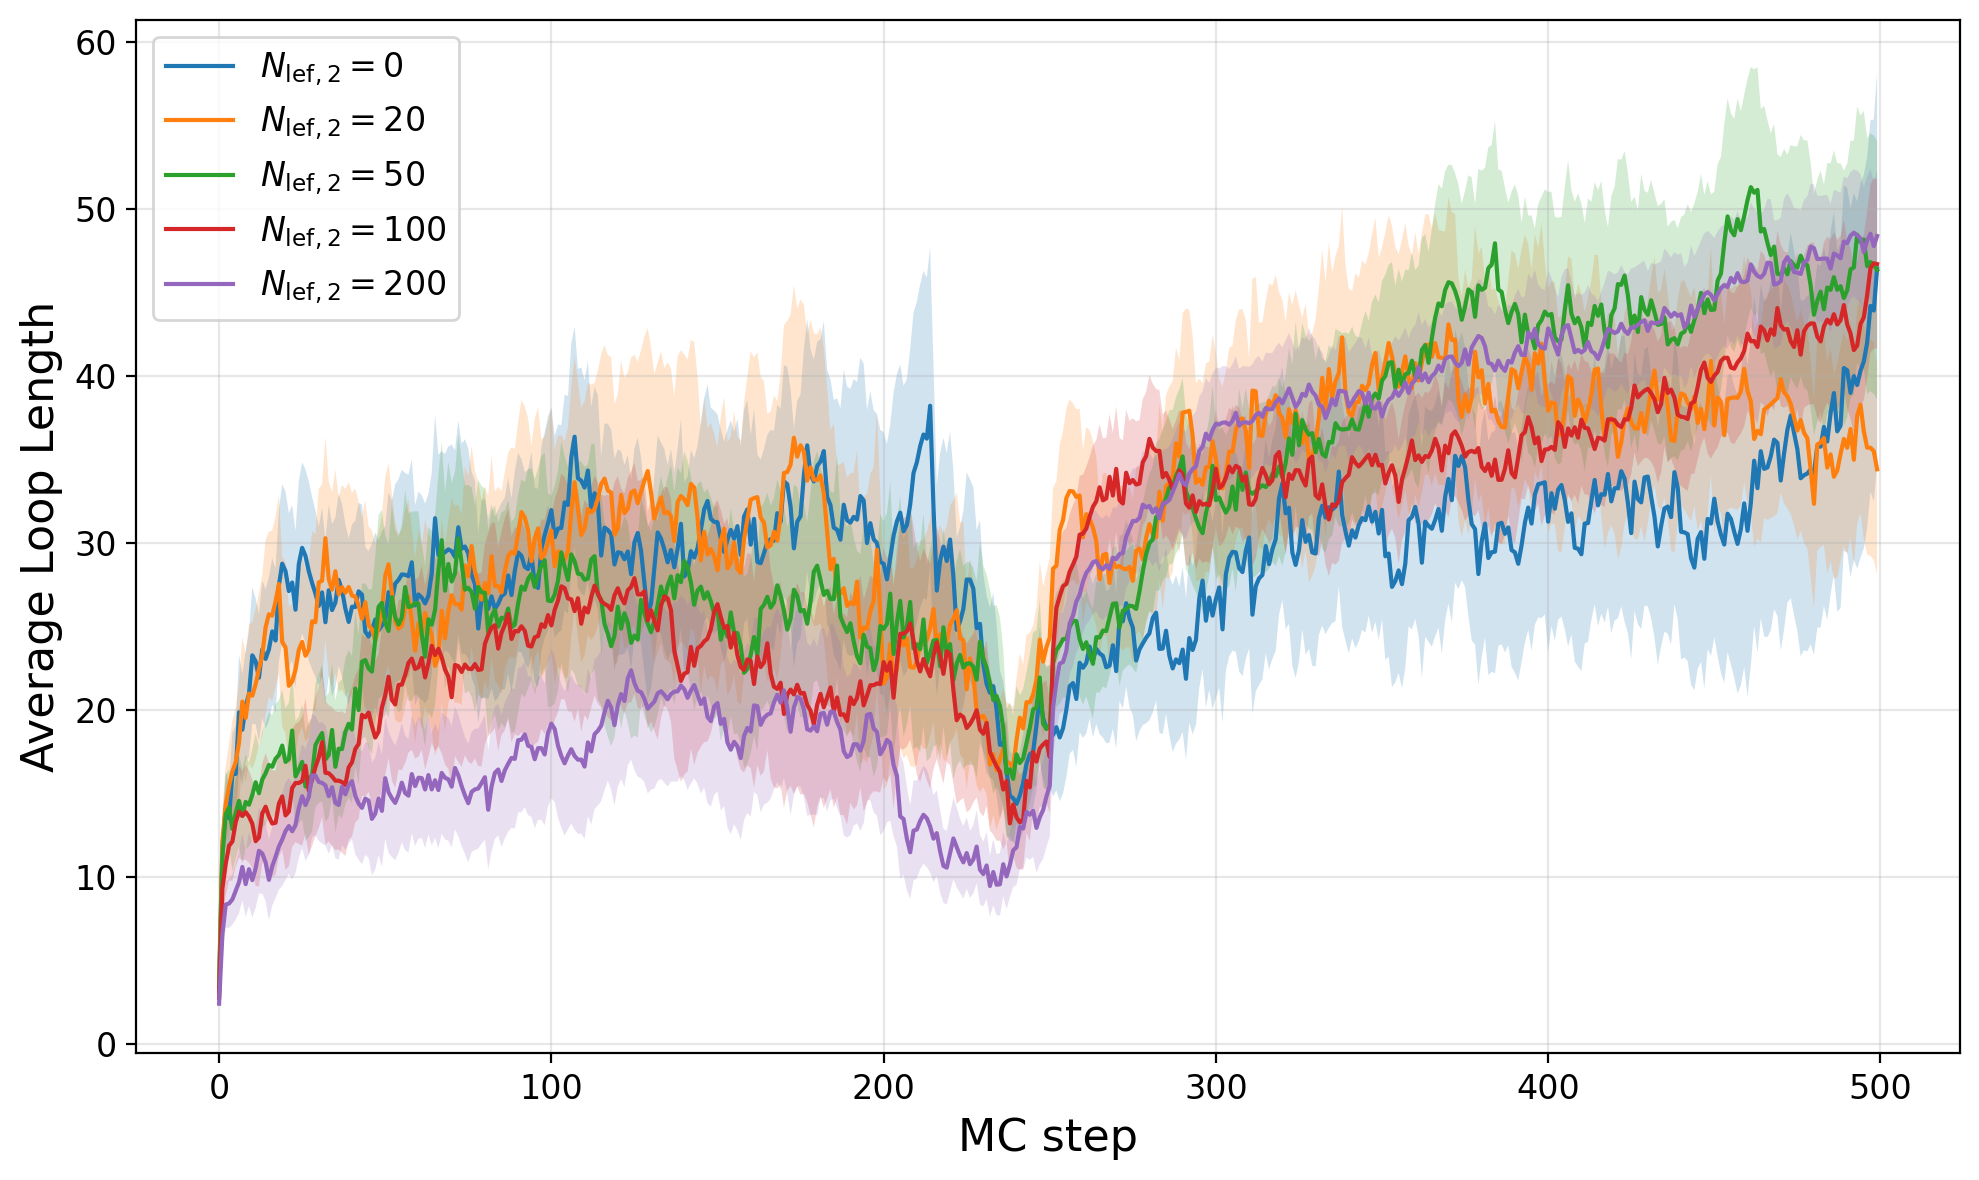

In [5]:
plt.figure(figsize=(10, 6),dpi=200)

for nlef in N_lefs:
    Ms = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/Ms.npy')
    Ns = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/Ns.npy')
    Ls = Ns-Ms
    avg_Ls = np.average(Ls,axis=0)
    std_Ls = np.std(Ls,axis=0)
    sem_Ls = std_Ls / np.sqrt(Ls.shape[0])  # SEM = std / sqrt(N)
    ci95 = 1.96 * sem_Ls
    
    x = np.arange(len(avg_Ls))
    plt.plot(x, avg_Ls, label=fr'$N_{{\mathrm{{lef}},2}}={nlef}$', alpha=1)
    plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2)
    
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Average Loop Length',fontsize=16)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show()

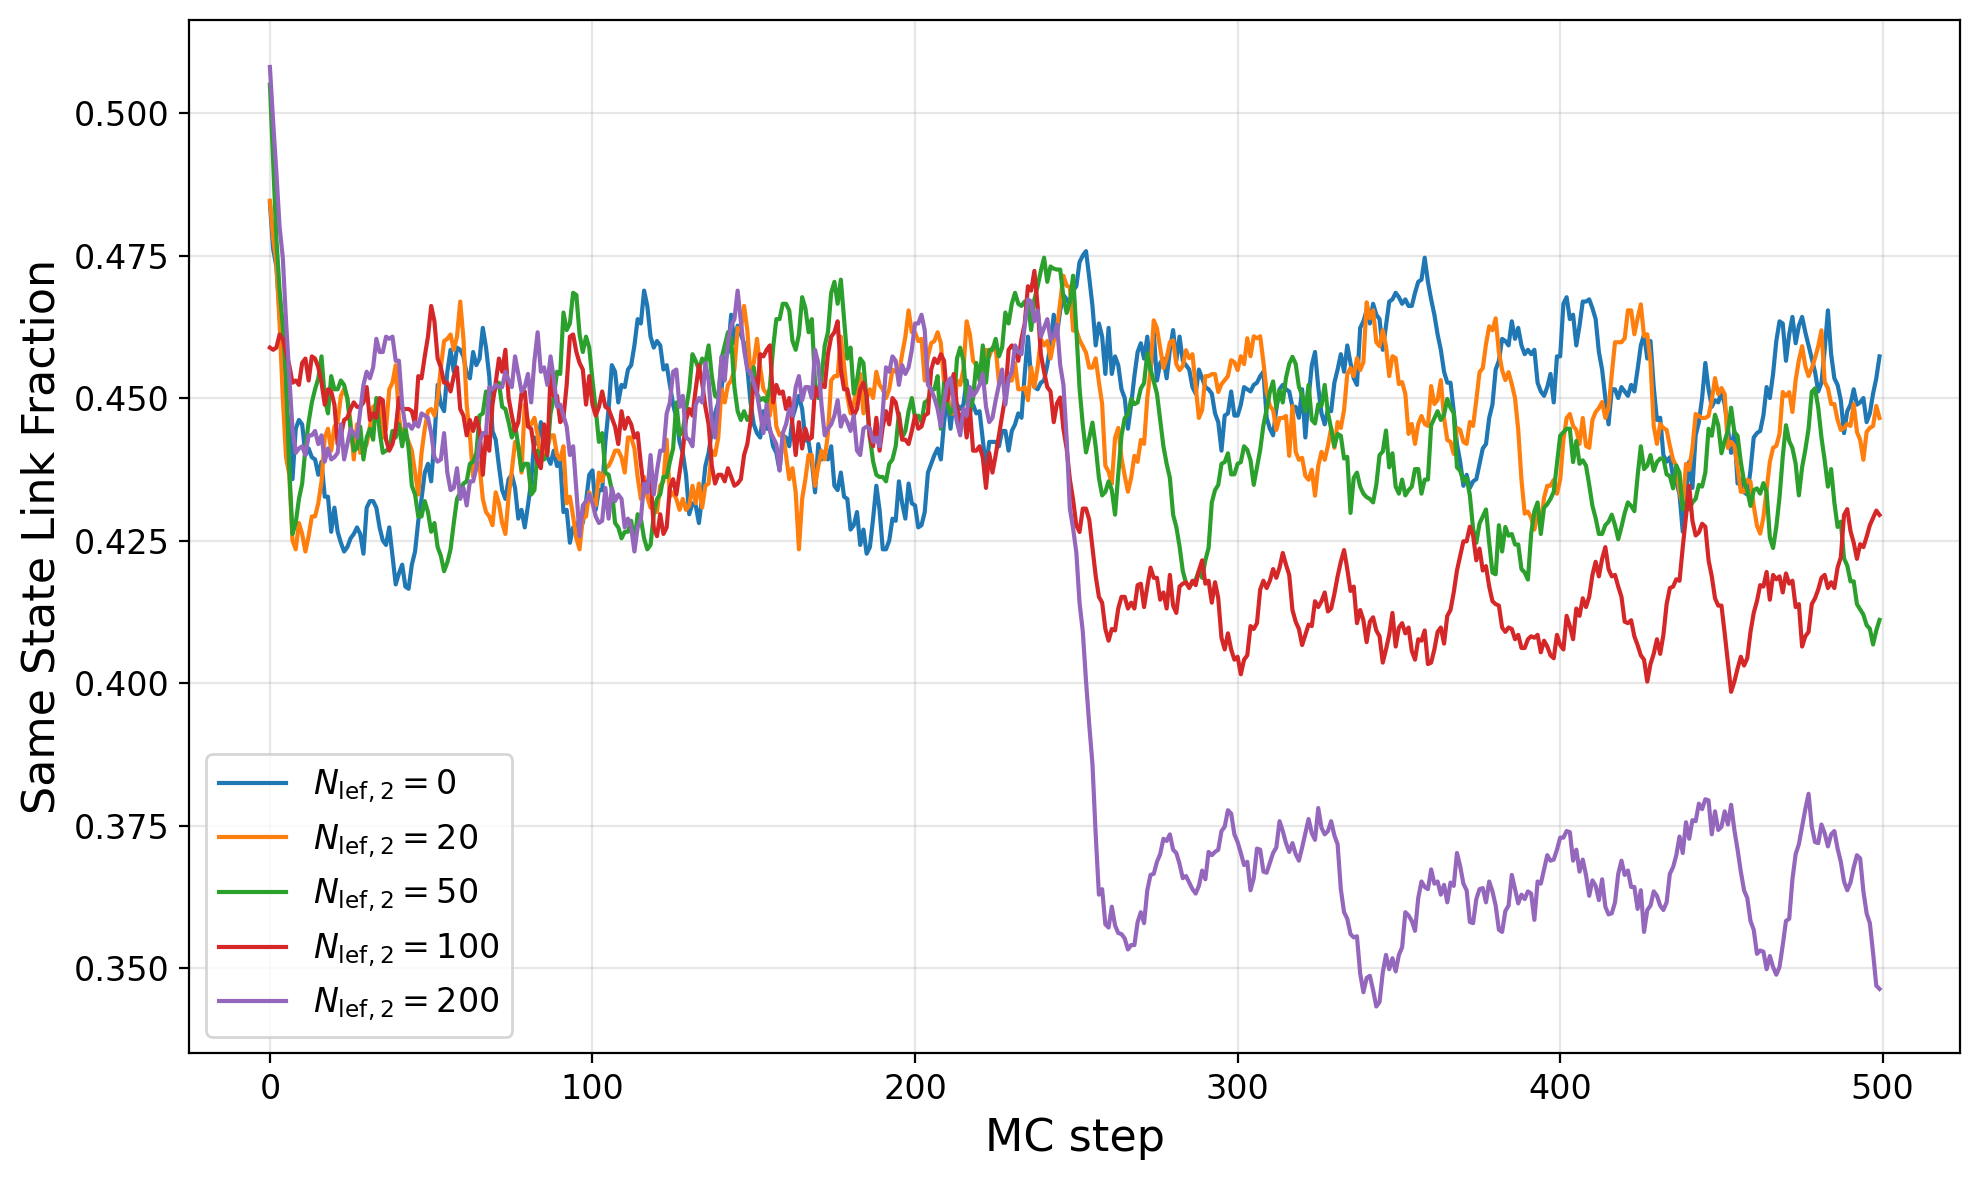

In [6]:
plt.figure(figsize=(10, 6),dpi=200)

for nlef in N_lefs:
    Ms = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/Ms.npy')
    Ns = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/Ns.npy')
    Cs = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/spins.npy')
    
    same_sign_fraction, diff_sign_fraction = compute_state_proportions_sign_based(Ms, Ns, Cs)
    same_sign_fraction = smooth_time_series(same_sign_fraction, 13)
    
    x = np.arange(len(same_sign_fraction))
    plt.plot(x, same_sign_fraction, label=fr'$N_{{\mathrm{{lef}},2}}={nlef}$', alpha=1)
    plt.xlabel('MC step',fontsize=16)
    plt.ylabel('Same State Link Fraction',fontsize=16)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show()

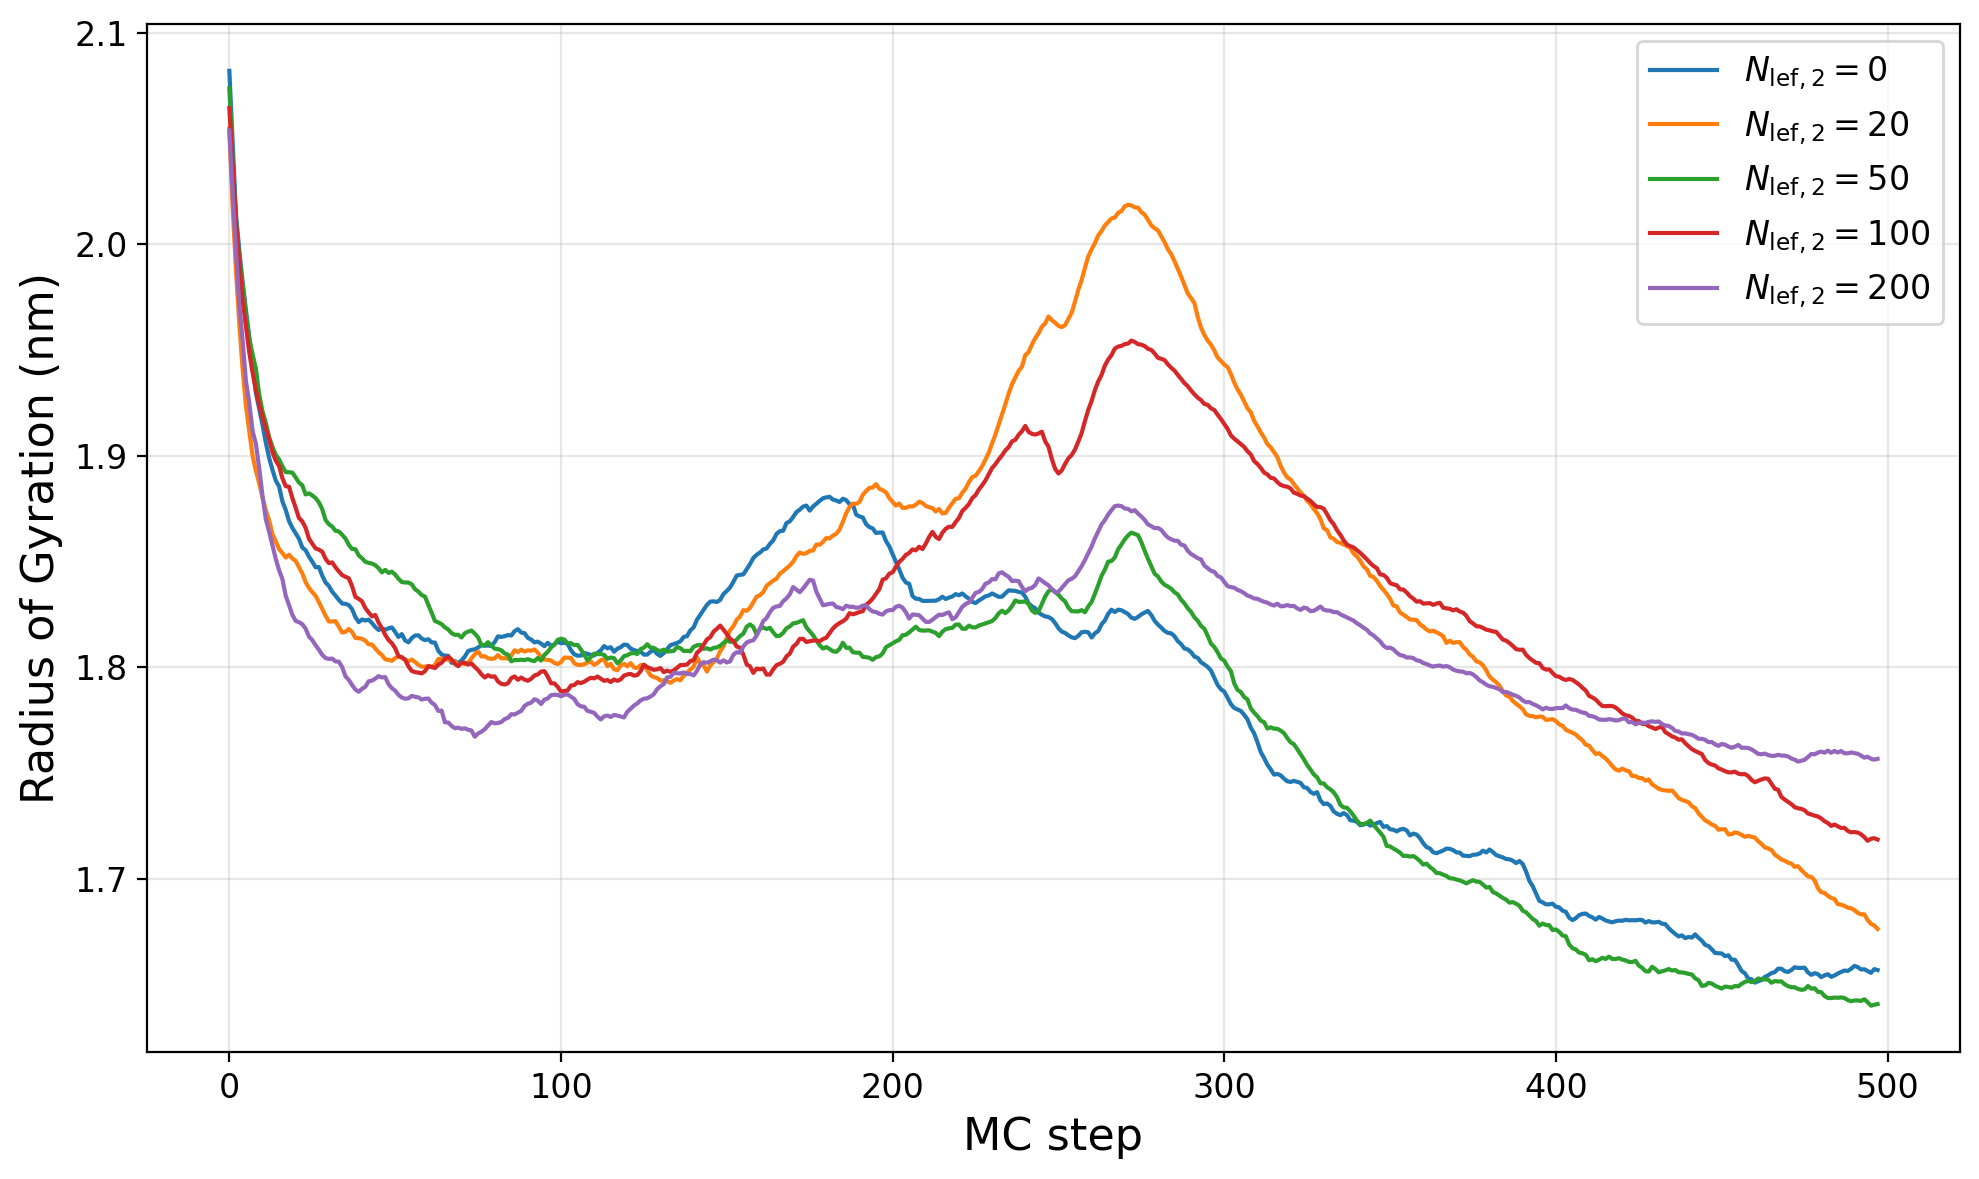

In [10]:
plt.figure(figsize=(10, 6),dpi=200)

for nlef in N_lefs:
    Rgs = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Nlef2_{nlef}_ht/metadata/Rgs.npy')*0.1
    
    x = np.arange(len(Rgs))
    plt.plot(x, Rgs, label=fr'$N_{{\mathrm{{lef}},2}}={nlef}$', alpha=1)
    plt.xlabel('MC step',fontsize=16)
    plt.ylabel('Radius of Gyration (nm)',fontsize=16)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12,frameon=True)
plt.tight_layout()
plt.show()

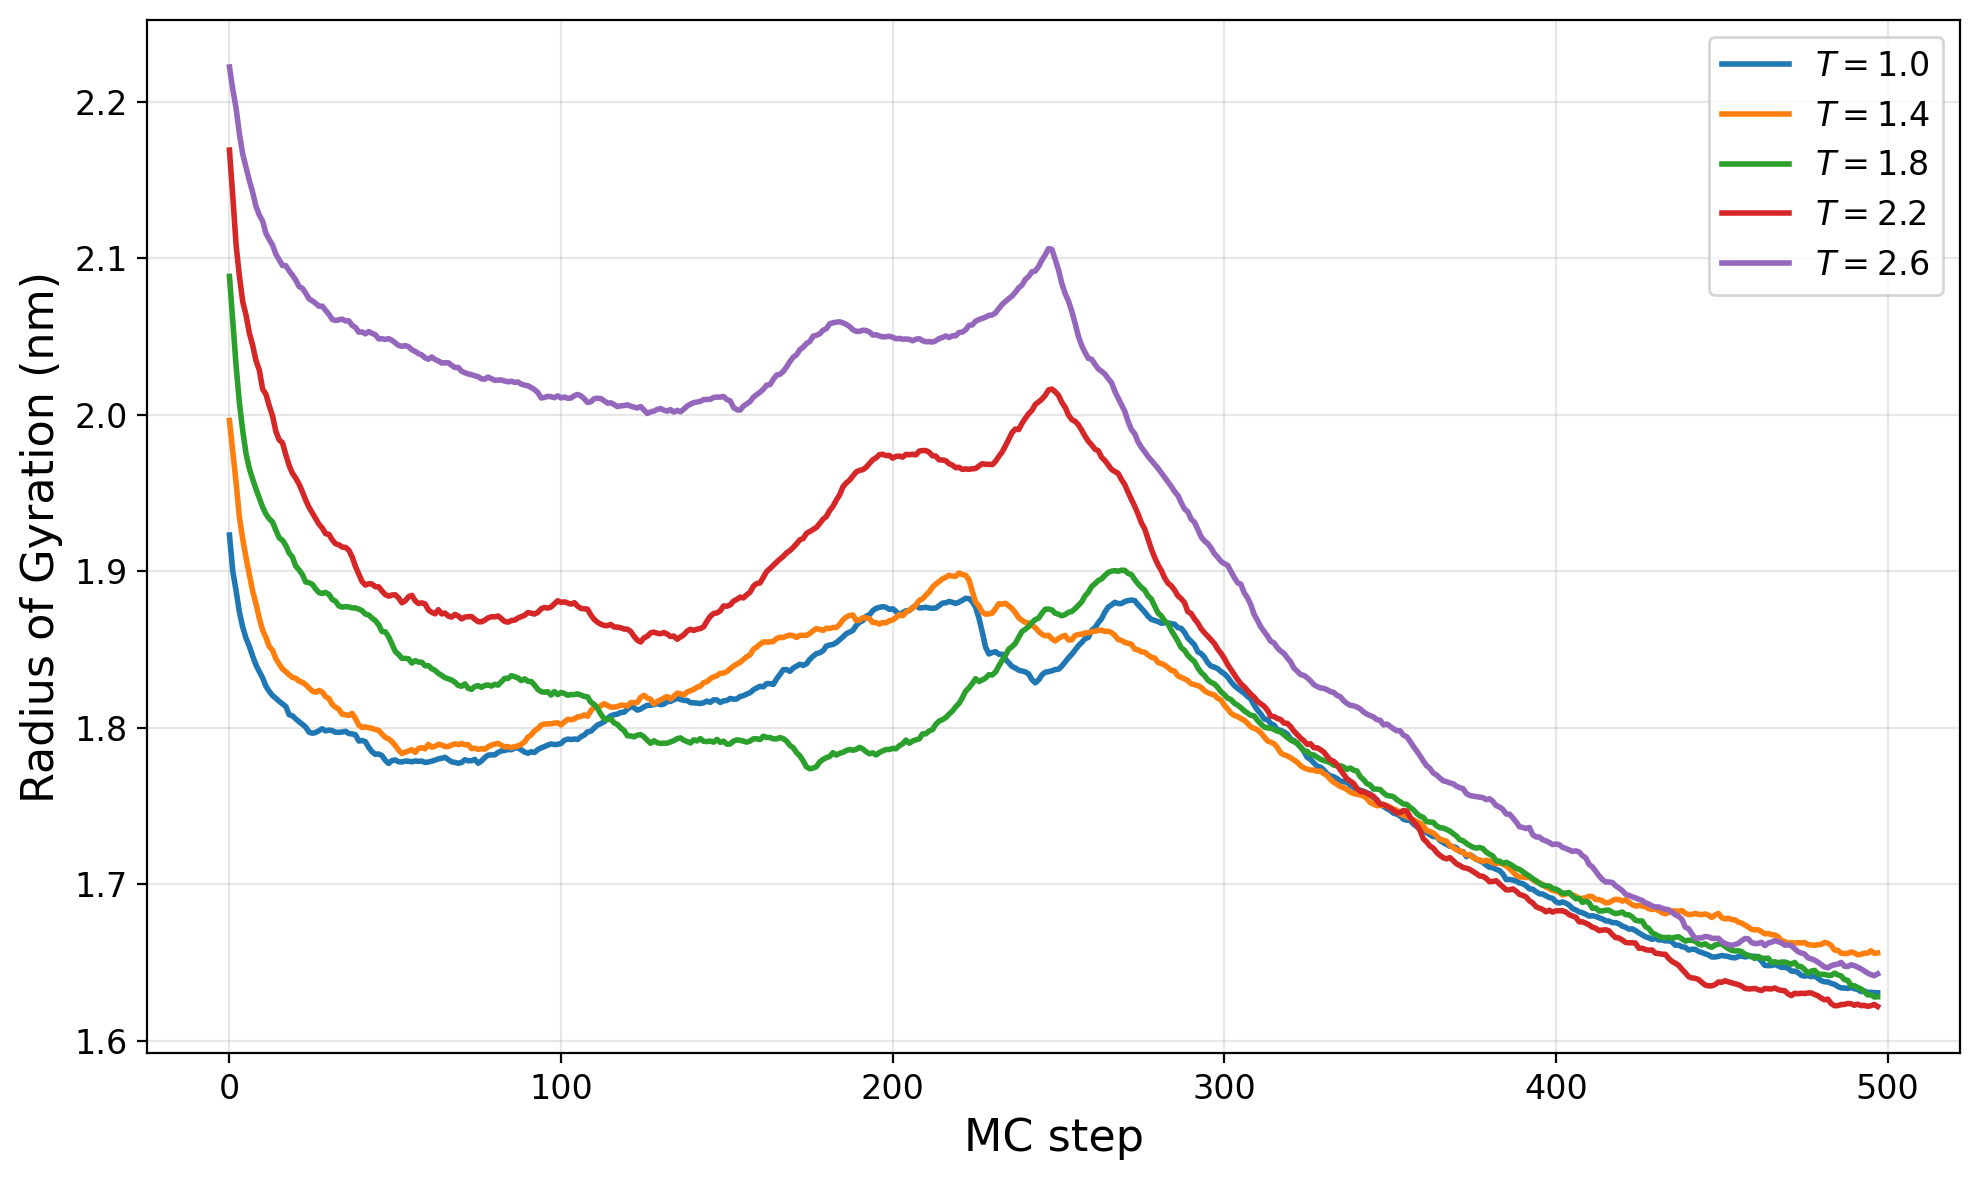

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6), dpi=200)

Ts = np.array([1.0, 1.4, 1.8, 2.2, 2.6])

for T in Ts:
    T = round(T, 3)
    Rgs = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Tinit_{T}_ht/metadata/Rgs.npy')*0.1
    x = np.arange(len(Rgs))
    plt.plot(x, Rgs, label=fr'$T={T}$', linewidth=2)

plt.xlabel('MC step', fontsize=16)
plt.ylabel('Radius of Gyration (nm)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

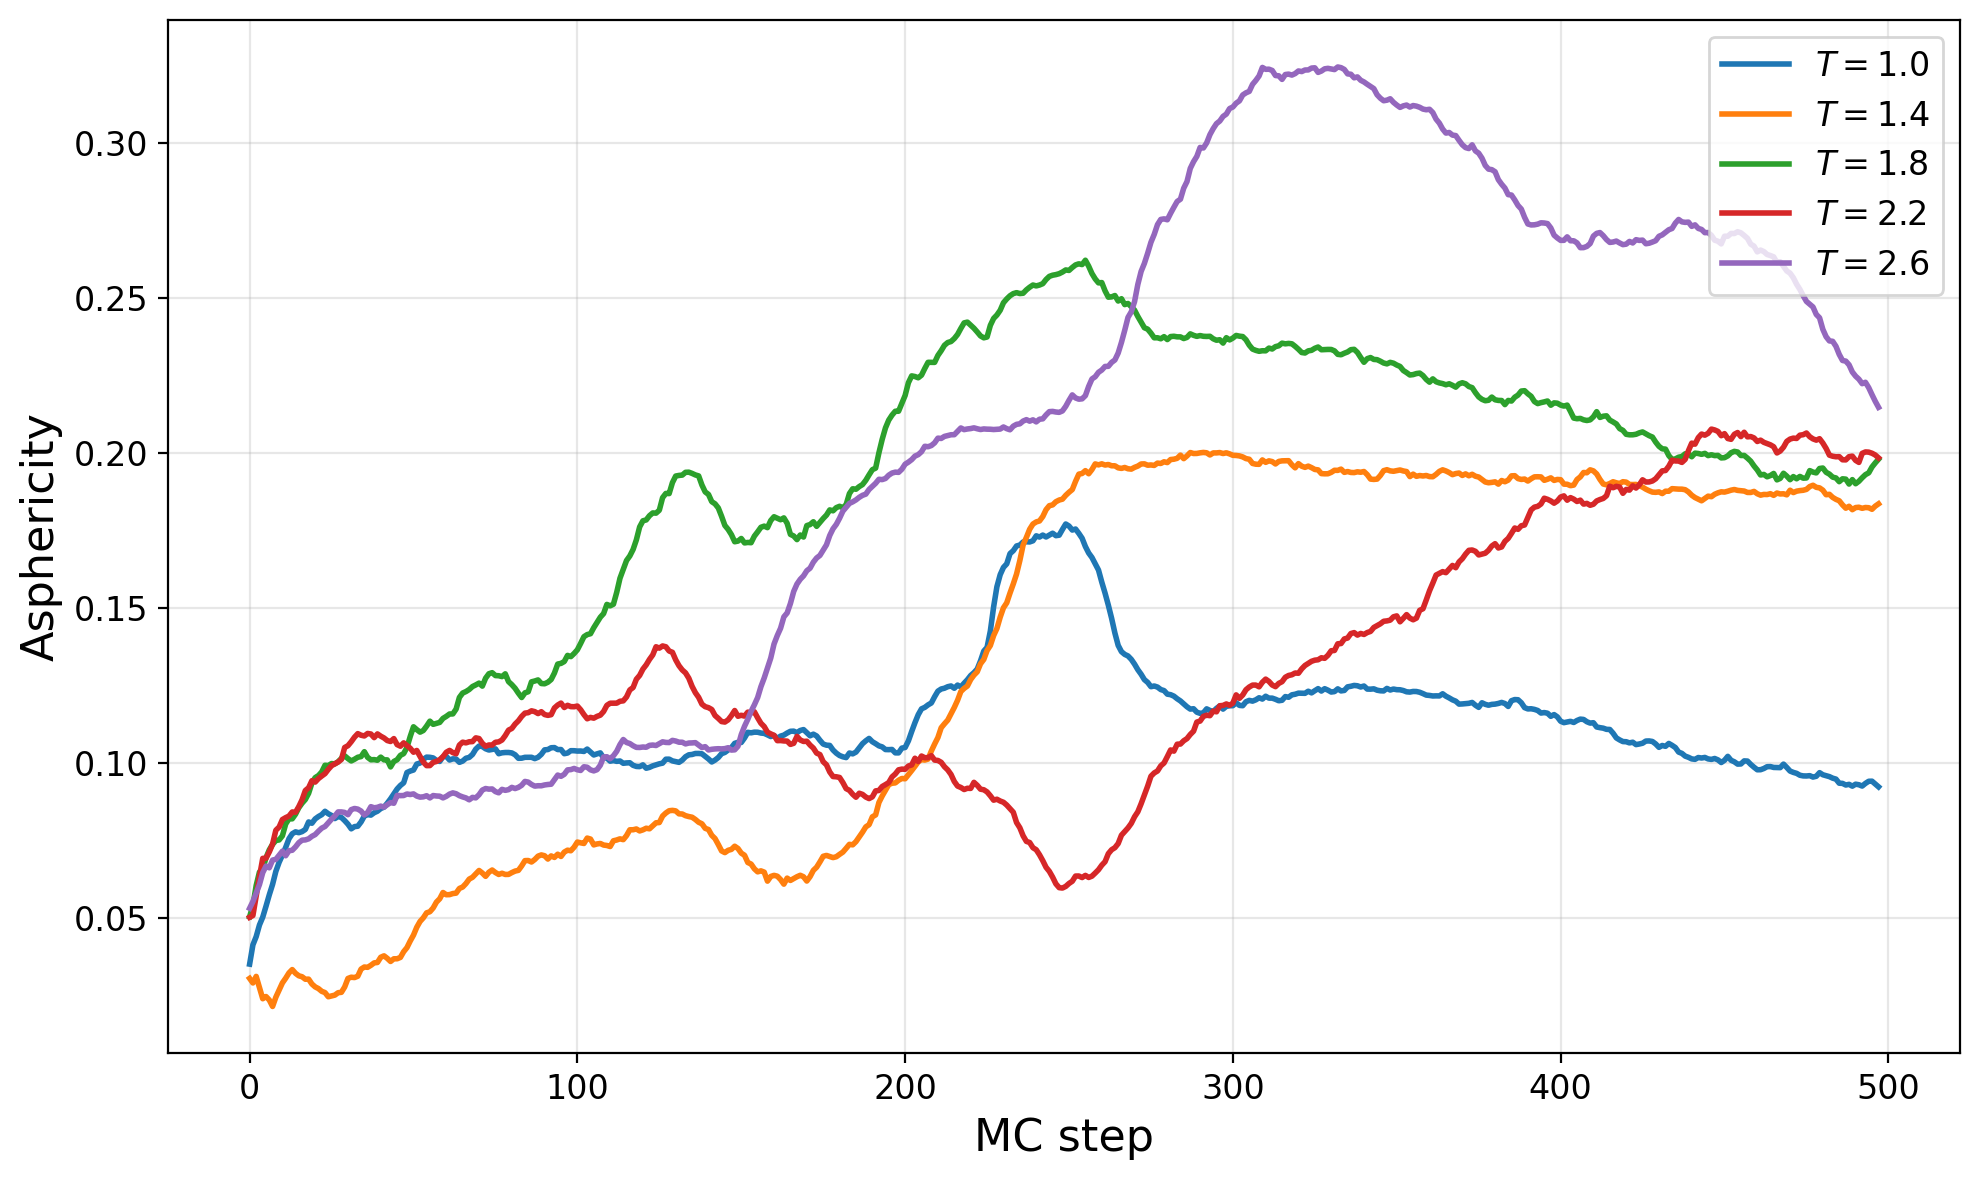

In [8]:
plt.figure(figsize=(10, 6), dpi=200)

Ts = np.array([1.0, 1.4, 1.8, 2.2, 2.6])

for T in Ts:
    T = round(T, 3)
    asphs = np.load(f'/home/skorsak/Downloads/replisage/new_results/RepliSage_Tinit_{T}_ht/metadata/asphs.npy')
    x = np.arange(len(asphs))
    plt.plot(x, asphs, label=fr'$T={T}$', linewidth=2)

plt.xlabel('MC step', fontsize=16)
plt.ylabel('Asphericity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12, loc='upper right', frameon=True)
plt.tight_layout()
plt.show()